# Arbitrary Style Transfer in Real-time with Adaptive Instance Normalization

In [1]:
# Run this cell if you are on external server like colab or kaggle. (Useful to train on GPU)
# !git clone "https://github.com/mathisemb/AdaIN.git"
# %cd AdaIN

## Imports

In [4]:
import torch
from PIL import Image
from utils.plot_tools import *
from utils.dataloader_maker2 import dataloader_maker
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Training of the decoder

### Dataloaders

In [5]:
content_path = 'utils/datasets/MS_COCO_val'
content_loader = dataloader_maker(folder_path= content_path, nb_of_images=8, batch_size=8)

style_path = 'utils/datasets/wikiart/wikiart'
style_loader = dataloader_maker(folder_path= style_path, nb_of_images=8, batch_size=8)

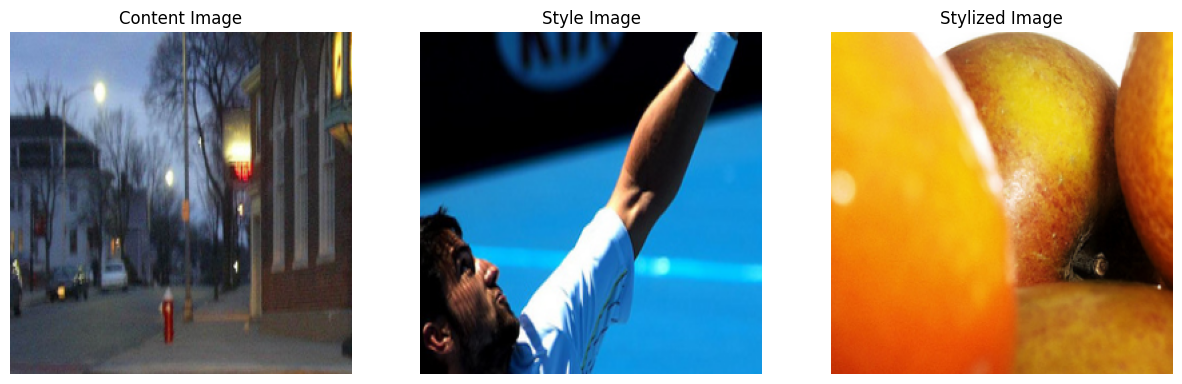

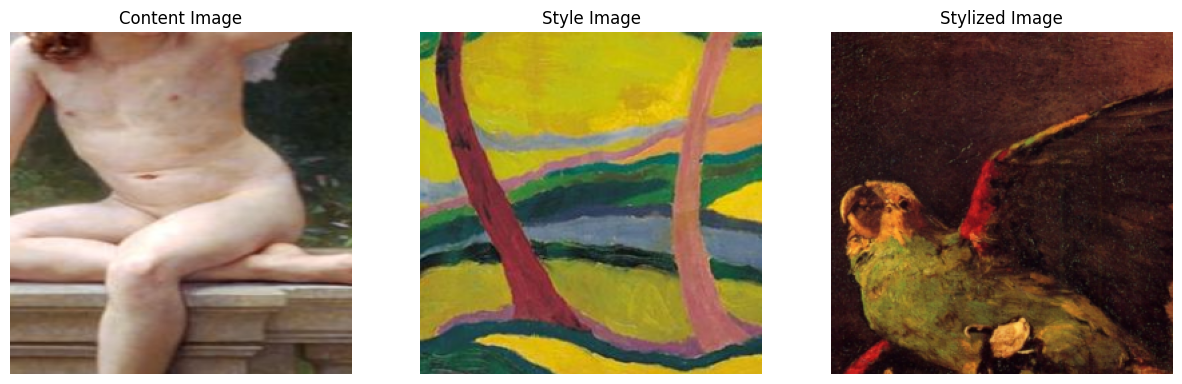

In [6]:
# Show some images
for img in content_loader :
    plot_img(img[0][0],img[0][1], img[0][2])
    break
for img in style_loader :
    plot_img(img[0][0],img[0][1], img[0][2])
    break

## Define the model

In [7]:
from model import StyleTransfer
lr = 3e-4
lam = 2.
model = StyleTransfer(lr=lr, lam=lam)

Using cache found in /Users/gurvanrichardeau/.cache/torch/hub/pytorch_vision_v0.9.0
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Training the decoder

In [8]:
# Training
nb_epochs = 1
model.train_decoder(content_loader, style_loader, nb_epochs)

Epoch : 1 Content Loss : 591827.188 Style Loss : 3338.172: 100%|██████████| 1/1 [00:16<00:00, 16.61s/it]


### Plot Loss

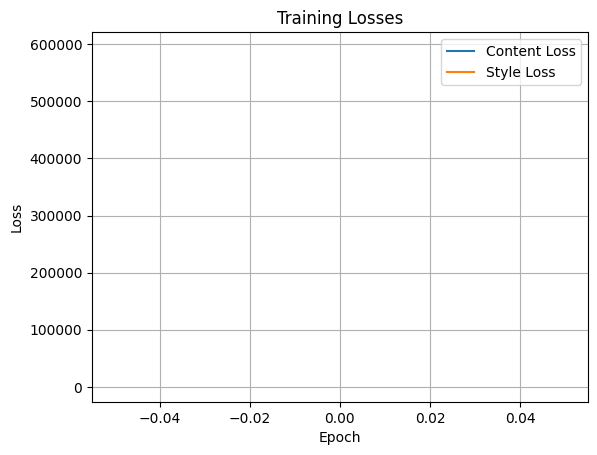

In [9]:
plot_losses(model.LOSS[0], model.LOSS[1])

### Saving model

In [ ]:
# Will automatically be saved into the saving_path : 'model_checkpoints/Adain/'
model.save()

### Loading model to retrain it

The loading is carried out in such a way that the era returns to where it was, and the list of all losses is continued and not overwritten.

In [ ]:
model = StyleTransfer(lr, lam)
checkpoint_epoch = 50 #Choose which model you want to load, see them in the saving_path : 'model_checkpoints/Adain/'


model.load(epoch=checkpoint_epoch)

model.train_decoder(content_loader, style_loader, nb_epochs)
model.save()

# Evaluating the model

## Load and preprocess the images

In [11]:
import torchvision.transforms as transforms


# Load the content and style images
content_img = Image.open("images/content/000000000785.jpg")
style_img = Image.open("images/style/albert-marquet_life-class-at-the-cole-des-beaux-arts-fauvist-nude-1898.jpg")

# Preprocess the images
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

content_tensor = preprocess(content_img).unsqueeze(0).to(device)
style_tensor = preprocess(style_img).unsqueeze(0).to(device)

#print("content_tensor:", content_tensor.shape)
#print("style_tensor:", style_tensor.shape)

#transforms.ToPILImage()(content_tensor.squeeze(0).cpu().clamp(0, 1)).show()
#transforms.ToPILImage()(style_tensor.squeeze(0).cpu().clamp(0, 1)).show()

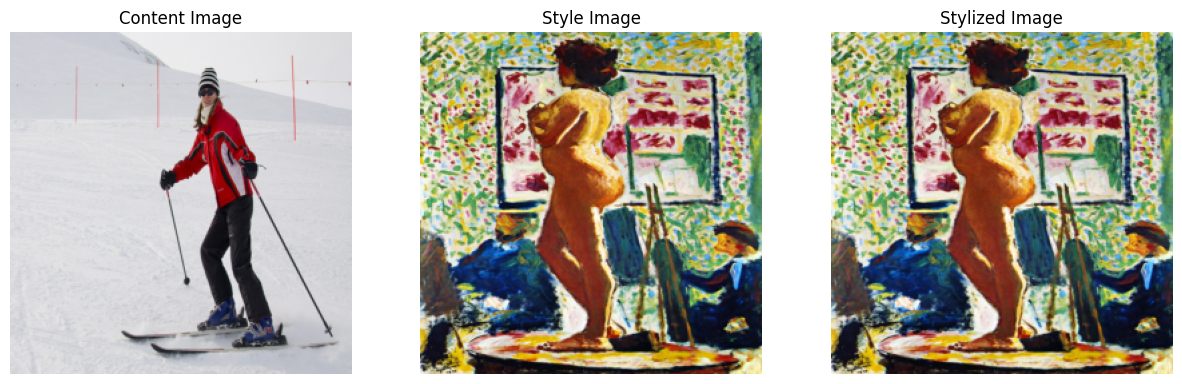

In [12]:
plot_img(content_tensor, style_tensor, style_tensor)

## Load and Run the model

In [ ]:
load_checkpoint = checkpoint_epoch + nb_epochs
#load_checkpoint = 50
print(load_checkpoint)

model = StyleTransfer()
model.load(load_checkpoint)

with torch.no_grad():
    stylized_img = model(content_tensor, style_tensor)

## Print the result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


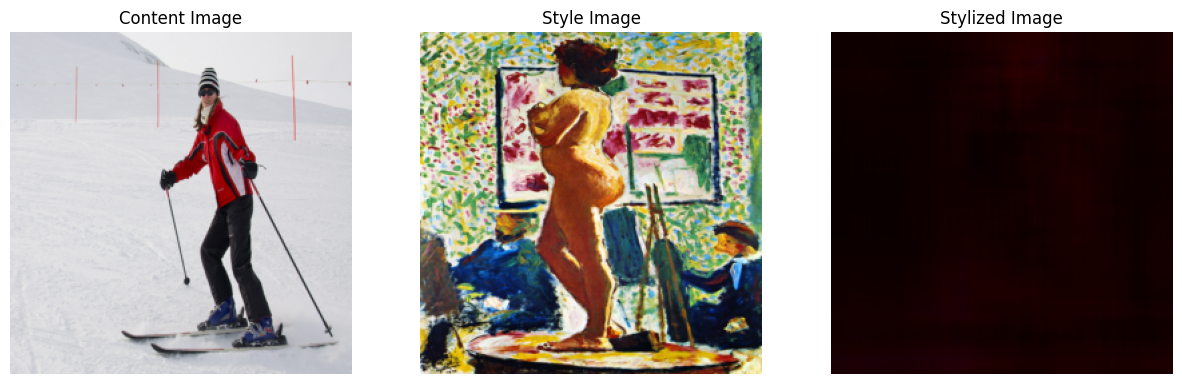

In [14]:
plot_img(content_tensor, style_tensor, stylized_img)